In [2]:
print("shantnu")

shantnu


In [3]:
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , recall_score , precision_score , accuracy_score

In [4]:
# Reading Dataset
books = pd.read_csv("Dataset/Books.csv")
rating = pd.read_csv("Dataset/Ratings.csv")
users = pd.read_csv("Dataset/Users.csv")

C:\Users\singh\AppData\Local\Temp\ipykernel_28180\4051864414.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Dataset/Books.csv")


#### Checking Data samples

In [5]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
170400,2708126660,MÃ?Â©thodes et astuces pour faire signer ses c...,Pascal Py,2001,Editions d'Organisation,http://images.amazon.com/images/P/2708126660.0...,http://images.amazon.com/images/P/2708126660.0...,http://images.amazon.com/images/P/2708126660.0...
61142,0786832622,Celebrate the Year with Winnie the Pooh (A Dis...,Various Artists,1999,Hyperion Books,http://images.amazon.com/images/P/0786832622.0...,http://images.amazon.com/images/P/0786832622.0...,http://images.amazon.com/images/P/0786832622.0...
235217,0553487469,Return of the Perfect Girls (Replica No. 18),Marilyn Kaye,2001,Skylark Books,http://images.amazon.com/images/P/0553487469.0...,http://images.amazon.com/images/P/0553487469.0...,http://images.amazon.com/images/P/0553487469.0...
28004,0849930502,No More Shacks!: The Daring Vision of Habitat ...,Millard Fuller,1986,Thomas Nelson Inc,http://images.amazon.com/images/P/0849930502.0...,http://images.amazon.com/images/P/0849930502.0...,http://images.amazon.com/images/P/0849930502.0...
23152,0060910496,The castle story (Harper colophon books),Sheila Sancha,1984,Harper &amp; Row,http://images.amazon.com/images/P/0060910496.0...,http://images.amazon.com/images/P/0060910496.0...,http://images.amazon.com/images/P/0060910496.0...


In [6]:
books.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
users.sample(5)

,User-ID,Location,Age
155233,155234,"palermo, ,",NaN
244758,244759,"sydney, new south wales, australia",42.0
49982,49983,"sacramento, california, usa",41.0
12287,12288,"las vegas, nevada, usa",NaN
187638,187639,"barcelona, n/a, catalonia",31.0


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
rating.sample(5)

,User-ID,ISBN,Book-Rating
466381,111349,014043.0725,8
418214,99630,0425167313,0
171813,37311,0515133302,0
338146,80683,0486277879,0
458444,110029,0863181449,0


In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
# cheeking for null values
print("Books Dataset")
print(books.isnull().sum())

print("\nUsers Dataset")
print(users.isnull().sum())

print("\nRating Dataset")
print(rating.isnull().sum())

Books Dataset
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Users Dataset
User-ID          0
Location         0
Age         110762
dtype: int64

Rating Dataset
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [12]:
# Conclusion : Users Dataset has Age attribute with significant missing values 
users = users.drop(columns= ['Age'] , axis=1)
users.isnull().sum()

# Books Dataset has less missing values so the rows can be dropped 
books = books.dropna(axis= 0)
books.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [13]:
# Cheking for Duplicates 

print("Books Dataset")
print(books.duplicated().sum())

print("\nUsers Dataset")
print(users.duplicated().sum())

print("\nRating Dataset")
print(rating.duplicated().sum())

Books Dataset
0

Users Dataset
0

Rating Dataset
0


#### <strong> EDA </strong>

<Axes: xlabel='Book-Rating', ylabel='Number of Books'>

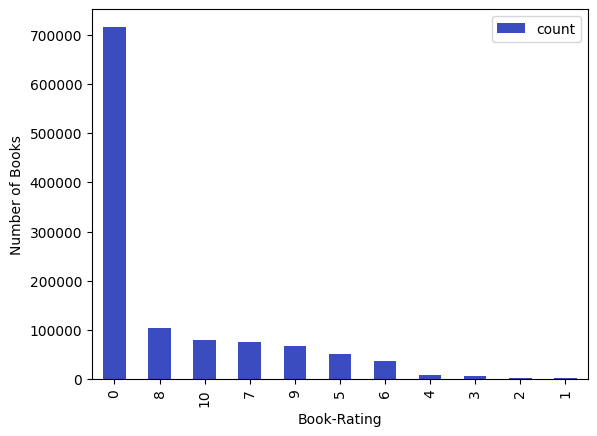

In [14]:
# cheking rating of books
rating['Book-Rating'].value_counts().plot(kind = "bar" , colormap= "coolwarm" , ylabel="Number of Books" , legend="Rating of Books", )

#### <strong>Model Building</strong>

In [18]:
# Making pupularity based recommender system

rating_with_name = rating.merge(books , on = "ISBN")
rating_with_name.shape
rating_with_name.sample(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1009646,238781,0553440284,0,The Outsider (Loveswept),Terry Lawrence,1990,Loveswept,http://images.amazon.com/images/P/0553440284.0...,http://images.amazon.com/images/P/0553440284.0...,http://images.amazon.com/images/P/0553440284.0...
157066,73458,0553213164,0,Anne of Windy Poplars (Anne of Green Gables No...,L.M. MONTGOMERY,1983,Bantam Classics,http://images.amazon.com/images/P/0553213164.0...,http://images.amazon.com/images/P/0553213164.0...,http://images.amazon.com/images/P/0553213164.0...
71534,52853,0553579606,0,Ashes to Ashes,TAMI HOAG,2000,Bantam,http://images.amazon.com/images/P/0553579606.0...,http://images.amazon.com/images/P/0553579606.0...,http://images.amazon.com/images/P/0553579606.0...
721047,173486,0345443993,0,"The Dragon Queen (Tales of Guinevere, Book 1)",ALICE BORCHARDT,2001,Del Rey,http://images.amazon.com/images/P/0345443993.0...,http://images.amazon.com/images/P/0345443993.0...,http://images.amazon.com/images/P/0345443993.0...
932026,150979,044040908X,0,Freaked,Todd Strasser,1993,Yearling Books,http://images.amazon.com/images/P/044040908X.0...,http://images.amazon.com/images/P/044040908X.0...,http://images.amazon.com/images/P/044040908X.0...


In [22]:
rating_with_name['ISBN'].value_counts().min() # Books have min rating of 1 people
rating_with_name['ISBN'].value_counts().max() # Books have max rating of 2501 people

2502

In [65]:
num_rating_df = rating_with_name.groupby("Book-Title").count()['Book-Rating'].reset_index()
num_rating_df = num_rating_df.rename(columns= {"Book-Rating" : "Number-of-Rating"})
num_rating_df

,Book-Title,Number-of-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241060,Ã?Â?lpiraten.,2
241061,Ã?Â?rger mit Produkt X. Roman.,4
241062,Ã?Â?sterlich leben.,1
241063,Ã?Â?stlich der Berge.,3


In [66]:
avg_rating_df = rating_with_name.groupby("Book-Title").mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df = avg_rating_df.rename(columns= {"Book-Rating" : "Avg-Rating"})
avg_rating_df

,Book-Title,Avg-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241060,Ã?Â?lpiraten.,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000
241062,Ã?Â?sterlich leben.,7.000000
241063,Ã?Â?stlich der Berge.,2.666667


In [67]:
final_popularity_df = num_rating_df.merge(avg_rating_df , on = "Book-Title")
final_popularity_df = final_popularity_df[final_popularity_df['Number-of-Rating'] >= 250].sort_values("Avg-Rating" , ascending=False).head(50)


In [68]:
final_popularity_df = final_popularity_df.merge(rating_with_name , on = "Book-Title").drop_duplicates("Book-Title")
final_popularity_df = final_popularity_df[['Book-Title' , "Avg-Rating" ,"Number-of-Rating" , "Book-Author" , "Image-URL-S" , "Publisher"]]
final_popularity_df


,Book-Title,Avg-Rating,Number-of-Rating,Book-Author,Image-URL-S,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...,Scholastic
428,Harry Potter and the Goblet of Fire (Book 4),5.824289,387,J. K. Rowling,http://images.amazon.com/images/P/0439139600.0...,Scholastic Paperbacks
815,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278,J. K. Rowling,http://images.amazon.com/images/P/043936213X.0...,Scholastic
1093,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,Scholastic
1440,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556,J. K. Rowling,http://images.amazon.com/images/P/0439064864.0...,Scholastic
1996,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,Del Rey
2277,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368,J. R. R. Tolkien,http://images.amazon.com/images/P/0618129030.0...,Houghton Mifflin Company
2645,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,Arthur A. Levine Books
3220,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260,J. R. R. Tolkien,http://images.amazon.com/images/P/0618002235.0...,Houghton Mifflin Company
3480,To Kill a Mockingbird,4.700000,510,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,Little Brown &amp; Company
